## Semester Final Project

***🎯 Goal:*** Ask a question and answer it with a statistical investigation of your choosing.

Please make sure that you review [the rubric](https://docs.google.com/document/d/1PXHbL4Nvk_SqhOTZBWf4ZHdwnrugab7S6n3LZnxmxr0/edit?usp=sharing) before starting the project. When you are ready, fill out the sections below.

__________________________

## 🔎 My Question
Does earlier academic performance relate to later exam performance?

## 📖 My Study 

- *What type of observational study will you be performing (retrospective or prospective)?*
- *What population will you be studying?*
- *What variables will you focus on in your study?*
- *How do you plan on collecting data?*
    - *What sampling technique will you use?*
    - *How will you ensure your data collection is random?*
- *What is one source of bias that may impact the results of your study?*

I am going to perform an observational and retrospective study. The variables I will be studying is the earlier performance and the final performance. This data comes from https://archive.ics.uci.edu/dataset/320/student+performance

Students who attend class more and study consistently may perform better on earlier and later exams. Those who don't may perform worse. This can make grades appear more predictive of later performance than they truly are. Teaching techniques and assignment difficulty may also produce some biases.

## 🗂️ My Data

*Collect your data using the cell below. When you are done with your collection, read the data into a dataframe and call `info()` on your dataframe.*

In [108]:
import zipfile
import os

zip_path = "student+performance.zip"
extract_path = "student_performance_data"

os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Files extracted to:", extract_path)

Files extracted to: student_performance_data


In [109]:
import os
print(os.listdir("student_performance_data"))

['.student.zip_old', 'student_inner', 'student.zip']


In [110]:
import zipfile
import os

inner_zip_path = "student_performance_data/student.zip"
inner_extract_path = "student_performance_data/student_inner"

os.makedirs(inner_extract_path, exist_ok=True)

with zipfile.ZipFile(inner_zip_path, 'r') as zip_ref:
    zip_ref.extractall(inner_extract_path)

print("Inner files extracted to:", inner_extract_path)
print("Files inside:", os.listdir(inner_extract_path))

Inner files extracted to: student_performance_data/student_inner
Files inside: ['student-mat.csv', 'student.txt', 'student-merge.R', 'student-por.csv']


In [111]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)    
pd.set_option('display.width', 1000)   
pd.set_option('display.colheader_justify', 'center')

print(df.head())

   G1  G3
0   5   6
1   5   6
2   7  10
3  15  15
4   6  10


## 📊 My Analysis

*Perform your analysis in the cell below. Please feel free to add more cells if you need them!*

===== Summary Statistics =====
           G1         G3    
mean    10.908861  10.415190
median  11.000000  11.000000
std      3.319195   4.581443


Correlation coefficient (r): 0.80


Regression line: Final Exam = 1.11 * G1 + -1.65




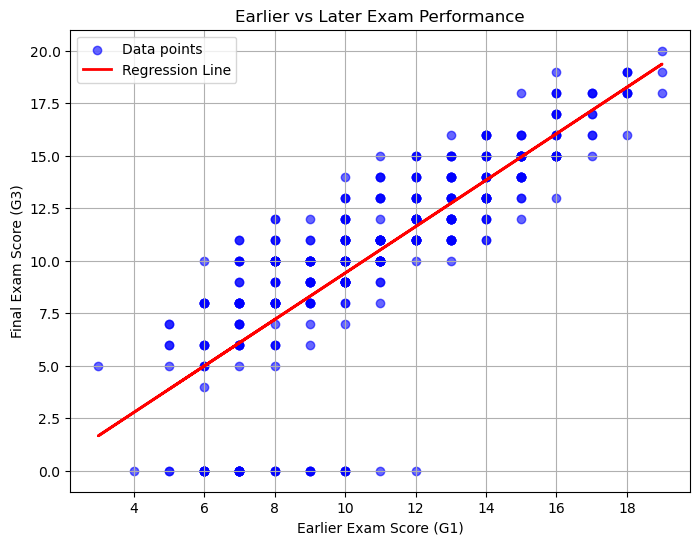

In [112]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression # bro im discovering new imports everyday

folder = "student_performance_data/student_inner"
csv_file = os.path.join(folder, 'student-mat.csv')

data = pd.read_csv(csv_file, sep=';')

df = data[['G1', 'G3']].copy()
df = df.dropna()

summary_stats = df.describe().loc[['mean', '50%', 'std']].rename(index={'50%':'median'})
print("===== Summary Statistics =====")
print(summary_stats)
print("\n")

r = df['G1'].corr(df['G3'])
print(f"Correlation coefficient (r): {r:.2f}")
print("\n")

X = df['G1'].values.reshape(-1,1)
y = df['G3'].values
model = LinearRegression()
model.fit(X, y)
print(f"Regression line: Final Exam = {model.coef_[0]:.2f} * G1 + {model.intercept_:.2f}")
print("\n")

plt.figure(figsize=(8,6))
plt.scatter(df['G1'], df['G3'], color='blue', alpha=0.6, label='Data points')
plt.plot(df['G1'], model.predict(X), color='red', linewidth=2, label='Regression Line')
plt.xlabel('Earlier Exam Score (G1)')
plt.ylabel('Final Exam Score (G3)')
plt.title('Earlier vs Later Exam Performance')
plt.grid(True)
plt.legend()
plt.show()

## 🧠 My Answer

This investigation shows that earlier academic performance does relate to later exam performance. The correlation coefficient, r = 0.80 indicates a positive relationship between earlier and later exam scores. The linear regression line indicates that for every 1 point increase in the earlier exam, the predicted final exam score increases by 1.11 points. The mean score for earlier exams is 10.90 while final exams are 10.41, showing that average early performance aligns with higher final exam performance.